# Credit Card Fraud Detection

When discussing financial transactions and consumer security on digital platforms, the
current market is defined by everyday credit card purchases, which contributes to a signi-
ficant increase in different types of fraud. Considering these perspectives, the Credit Card
Fraud Detection dataset was chosen to be used in order to understand the process behind
this application standard used by global companies. Therefore, the aim of Task 1 is to
develop a neural network for credit card fraud detection by understanding the pattern of
fraudulent activities.

In [99]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from scipy.stats import truncnorm
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

## EDA

In [100]:
# Load the dataset using pandas read_csv 

df = pd.read_csv('credit_card_fraud_dataset.csv')

In [101]:
# Display dataset shape of the datasets

df.shape

(100000, 7)

In [102]:
# Display first 10 rows of the dataset 

df.head(10)

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
5,6,2024-08-30 01:52:35.462867,3086.22,302,purchase,New York,0
6,7,2024-01-02 11:31:35.462875,1466.90,902,refund,Philadelphia,0
7,8,2024-05-12 12:25:35.462885,917.21,266,purchase,New York,0
8,9,2023-11-16 02:20:35.462894,1625.73,32,refund,Chicago,0
9,10,2023-10-24 06:51:35.462901,662.07,193,purchase,Dallas,0


In [103]:
# Understanding the datatypes of all the features columns of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [104]:
# Statistical Analysis of the dataset 

df.describe()

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


In [105]:
# Checking null values present in the dataset

df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [106]:
# Reset index columns to Transaction ID

df = df.set_index('TransactionID')

df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
TransactionID,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0


In [107]:
# Find the Balance in the target 

df['IsFraud'].value_counts()

IsFraud
0    99000
1     1000
Name: count, dtype: int64

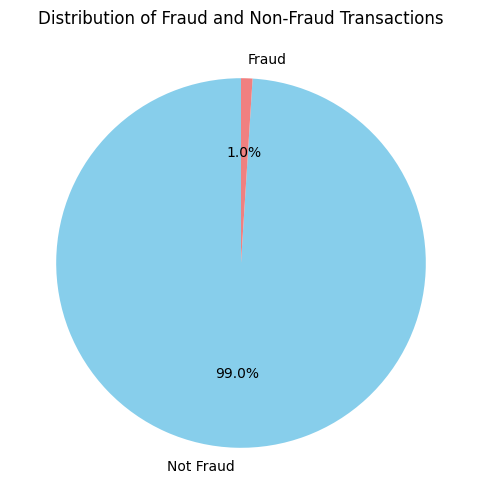

In [108]:
#Pie Chart representation to understand balance of the target columns
comparing_values = df['IsFraud'].value_counts()

labels = comparing_values.index.map({0: "Not Fraud", 1: "Fraud"})

plt.figure(figsize=(6, 6))
plt.pie(
    comparing_values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title("Distribution of Fraud and Non-Fraud Transactions")
plt.show()

In [109]:
# Different types of locations and locations that appear most in the dataset

df['Location'].value_counts()

Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64

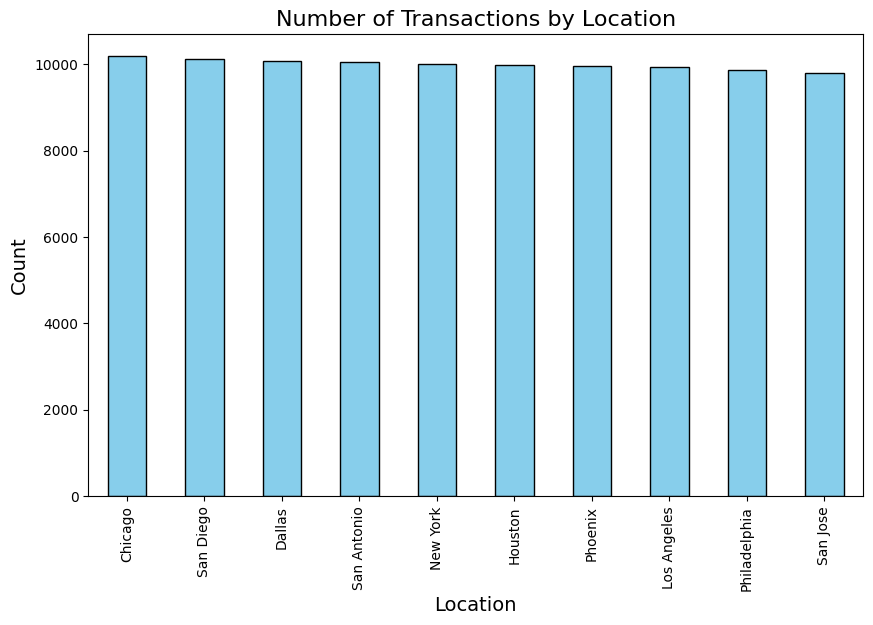

In [110]:
# Graphical represention of the location
location_total = df['Location'].value_counts()

plt.figure(figsize=(10, 6))
location_total.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Transactions by Location', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [111]:
# Total Amount related to  TransactionType 

df.groupby(['TransactionType'])['Amount'].sum()

TransactionType
purchase    1.246949e+08
refund      1.250144e+08
Name: Amount, dtype: float64

In [112]:
# Verify data range of dataset 

least_recent_date = df['TransactionDate'].min()
most_recent_date = df['TransactionDate'].max()


print("Data range :", least_recent_date,"until",most_recent_date)

Data range : 2023-10-21 09:28:35.824439 until 2024-10-21 09:20:35.961088


In [113]:
# Total of Amount per  distinct TransactionDate in descending order 

df_date = df.copy()

df_date['TransactionDate'] = pd.to_datetime(df_date['TransactionDate']).dt.date


transaction_date_amount = df_date.groupby(['TransactionDate'])['Amount'].sum().sort_index(ascending=True)

transaction_date_amount

TransactionDate
2023-10-21    369760.87
2023-10-22    717626.99
2023-10-23    615269.75
2023-10-24    671223.41
2023-10-25    618389.80
                ...    
2024-10-17    681295.57
2024-10-18    704287.87
2024-10-19    590240.51
2024-10-20    652894.65
2024-10-21    280354.61
Name: Amount, Length: 367, dtype: float64

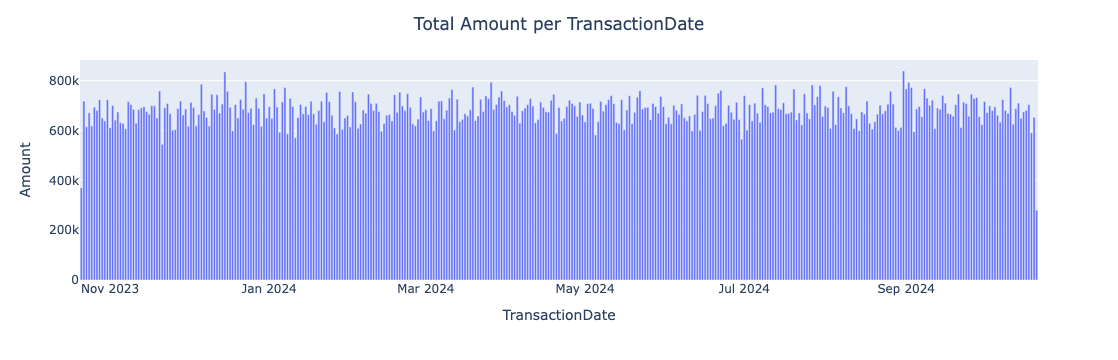

In [114]:
# Amount per Transaction Date

fig = px.bar(transaction_date_amount, x=transaction_date_amount.index, y="Amount")
fig.update_layout(
      title={
        'text': "Total Amount per TransactionDate",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="TransactionDate",
    yaxis_title="Amount"
)
fig.show()

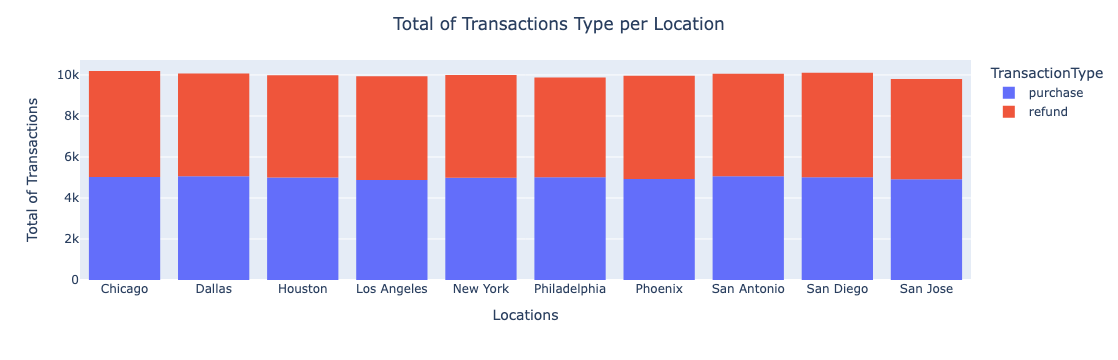

In [115]:
# Total of Refund and Purchase
transaction_counts = df.groupby(['Location', 'TransactionType']).size().reset_index(name='Count')

transaction_counts
fig = px.histogram(transaction_counts, x="Location", y="Count", color="TransactionType")
fig.update_layout(
      title={
        'text': "Total of Transactions Type per Location",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Locations",
    yaxis_title="Total of Transactions"

)

fig.show()

In [116]:
# Convert 'TransactionDate' to datetime and extract date-related features

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Year'] = df['TransactionDate'].dt.year
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day
df['Hour'] = df['TransactionDate'].dt.hour

df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Year,Month,Day,Hour
TransactionID,,,,,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024,4,3,14
2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024,3,19,13
3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024,1,8,10
4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024,4,13,23
5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024,7,12,18
...,...,...,...,...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0,2024,6,7,0
99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0,2023,10,22,23
99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0,2024,5,31,19


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionDate  100000 non-null  datetime64[ns]
 1   Amount           100000 non-null  float64       
 2   MerchantID       100000 non-null  int64         
 3   TransactionType  100000 non-null  object        
 4   Location         100000 non-null  object        
 5   IsFraud          100000 non-null  int64         
 6   Year             100000 non-null  int32         
 7   Month            100000 non-null  int32         
 8   Day              100000 non-null  int32         
 9   Hour             100000 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), int64(2), object(2)
memory usage: 6.9+ MB


In [118]:
df

,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud,Year,Month,Day,Hour
TransactionID,,,,,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0,2024,4,3,14
2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0,2024,3,19,13
3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0,2024,1,8,10
4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0,2024,4,13,23
5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0,2024,7,12,18
...,...,...,...,...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0,2024,6,7,0
99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0,2023,10,22,23
99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0,2024,5,31,19


In [119]:
##Encoding categorical features
df_encoded = pd.get_dummies(df, columns=['TransactionType', 'Location'], dtype=int)
df_encoded

,TransactionDate,Amount,MerchantID,IsFraud,Year,Month,Day,Hour,TransactionType_purchase,TransactionType_refund,Location_Chicago,Location_Dallas,Location_Houston,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Jose
TransactionID,,,,,,,,,,,,,,,,,,,,
1,2024-04-03 14:15:35.462794,4189.27,688,0,2024,4,3,14,0,1,0,0,0,0,0,0,0,1,0,0
2,2024-03-19 13:20:35.462824,2659.71,109,0,2024,3,19,13,0,1,0,1,0,0,0,0,0,0,0,0
3,2024-01-08 10:08:35.462834,784.00,394,0,2024,1,8,10,1,0,0,0,0,0,1,0,0,0,0,0
4,2024-04-13 23:50:35.462850,3514.40,944,0,2024,4,13,23,1,0,0,0,0,0,0,1,0,0,0,0
5,2024-07-12 18:51:35.462858,369.07,475,0,2024,7,12,18,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,2024-06-07 00:57:36.027591,1057.29,289,0,2024,6,7,0,0,1,0,0,0,0,0,0,0,1,0,0
99997,2023-10-22 23:12:36.027594,297.25,745,0,2023,10,22,23,0,1,0,0,0,0,0,0,0,1,0,0
99998,2024-05-31 19:27:36.027597,3448.56,690,0,2024,5,31,19,1,0,0,0,0,0,0,0,0,1,0,0


In [123]:
y = df_encoded['IsFraud']
X = df_encoded.drop(columns = ['IsFraud','TransactionDate'])

print(X.shape)
print(y.shape)

(100000, 18)
(100000,)


In [124]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [125]:
##Scaling the data into a standard distribution for neural network training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:

## Balancing the dataset
from imblearn.over_sampling import SMOTE


# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train_scaled, y_train)

## Building Neural Network 

##### The code above was based in Lab 06 of Programming Programming and Mathematics for Artificial Intelligence from Dr. Atif Riaz

In [127]:
##Neural Network 

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                 no_of_out_nodes,
                 no_of_hidden_nodes1,
                 no_of_hidden_nodes2,
                 learning_rate,
                 optimizer="mini_batch_sgd",  # Choose optimizer between mini batch and sgd
                 l1_lambda=0.0,               # L1 regularization strength which can be adjusted according to the accuracy
                 l2_lambda=0.0,               # L2 regularization strength also can ve adjusted according to the final accuracy
                 hidden_activation="relu",
                 output_activation="sigmoid",
                 dropout_rate=0.0  # Dropout rate and preferred drop out can be set as 0.5
                ):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes1 = no_of_hidden_nodes1
        self.no_of_hidden_nodes2 = no_of_hidden_nodes2
        self.learning_rate = learning_rate
        self.optimizer = optimizer.lower()  # Convert to lowercase for consistency
        self.l1_lambda = l1_lambda
        self.l2_lambda = l2_lambda
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        self.dropout_rate = dropout_rate
        self.create_weight_matrices()

    def create_weight_matrices(self):
        X = truncated_normal(mean=0, sd=1, low=-0.5, upp=0.5)

        # Create wih1 with shape [hidden1 x in]
        self.wih1 = X.rvs(self.no_of_hidden_nodes1 * self.no_of_in_nodes).reshape(
            (self.no_of_hidden_nodes1, self.no_of_in_nodes)
        )

        # Create wh1h2 with shape [hidden2 x hidden1]
        self.wh1h2 = X.rvs(self.no_of_hidden_nodes2 * self.no_of_hidden_nodes1).reshape(
            (self.no_of_hidden_nodes2, self.no_of_hidden_nodes1)
        )

        # Create who with shape [out from last layer x hidden2]
        self.who = X.rvs(self.no_of_out_nodes * self.no_of_hidden_nodes2).reshape(
            (self.no_of_out_nodes, self.no_of_hidden_nodes2)
        )

    # Activation functions
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def softmax(self, x):
        exps = np.exp(x - np.max(x))
        return exps / np.sum(exps, axis=0, keepdims=True)

    def cross_entropy_loss(self, predictions, targets):
        return -np.sum(targets * np.log(predictions + 1e-15))

    def cross_entropy_derivative(self, predictions, targets):
        return predictions - targets

    def l1_regularization(self, weights):
        return self.l1_lambda * np.sign(weights)

    def l2_regularization(self, weights):
        return self.l2_lambda * weights

    def activate(self, x, function):
        if function == "sigmoid":
            return self.sigmoid(x)
        elif function == "relu":
            return self.relu(x)
        elif function == "softmax":
            return self.softmax(x)
        else:
            raise ValueError("Unknown activation function")

    def activate_derivative(self, x, function):
        if function == "sigmoid":
            return self.sigmoid_derivative(x)
        elif function == "relu":
            return self.relu_derivative(x)
        else:
            raise ValueError("Unknown activation function")

    def apply_dropout(self, activations):
        """Apply dropout to the activations."""
        if self.dropout_rate > 0:
            dropout_mask = np.random.rand(*activations.shape) > self.dropout_rate
            return activations * dropout_mask / (1.0 - self.dropout_rate)  # Scale activations
        return activations
    def train_single(self, input_vector, target_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        # Forward pass with dropout
        hidden_input1 = np.dot(self.wih1, input_vector)
        hidden_output1 = self.activate(hidden_input1, self.hidden_activation)
        hidden_output1 = self.apply_dropout(hidden_output1)  # Apply dropout

        hidden_input2 = np.dot(self.wh1h2, hidden_output1)
        hidden_output2 = self.activate(hidden_input2, self.hidden_activation)
        hidden_output2 = self.apply_dropout(hidden_output2)  # Apply dropout

        final_input = np.dot(self.who, hidden_output2)
        final_output = self.activate(final_input, self.output_activation)

        # Compute loss
        loss = self.cross_entropy_loss(final_output, target_vector)

        # Backward pass
        output_errors = self.cross_entropy_derivative(final_output, target_vector)
        l1_who = self.l1_regularization(self.who)
        l2_who = self.l2_regularization(self.who)
        self.who -= self.learning_rate * (np.dot(output_errors, hidden_output2.T) + l1_who + l2_who)

        hidden_errors2 = np.dot(self.who.T, output_errors)
        hidden_grad2 = hidden_errors2 * self.activate_derivative(hidden_input2, self.hidden_activation)
        l1_wh1h2 = self.l1_regularization(self.wh1h2)
        l2_wh1h2 = self.l2_regularization(self.wh1h2)
        self.wh1h2 -= self.learning_rate * (np.dot(hidden_grad2, hidden_output1.T) + l1_wh1h2 + l2_wh1h2)

        hidden_errors1 = np.dot(self.wh1h2.T, hidden_grad2)
        hidden_grad1 = hidden_errors1 * self.activate_derivative(hidden_input1, self.hidden_activation)
        l1_wih1 = self.l1_regularization(self.wih1)
        l2_wih1 = self.l2_regularization(self.wih1)
        self.wih1 -= self.learning_rate * (np.dot(hidden_grad1, input_vector.T) + l1_wih1 + l2_wih1)

        return loss

    def train_batch(self, batch_data, batch_labels):
        """Train the network on a batch of data."""
        total_loss = 0
        for input_vector, target_vector in zip(batch_data, batch_labels):
            total_loss += self.train_single(input_vector, target_vector)
        return total_loss / len(batch_data)

    # SGD
    def sgd(self, data, labels):
        """Stochastic Gradient Descent (SGD).SGD will Updates weights for every data point training ."""
        total_loss = 0
        for i in range(len(data)):
            loss = self.train_single(data[i], labels[i])
            total_loss += loss
        return total_loss / len(data)

    # Mini-Batch Optimizer
    def mini_batch_sgd(self, data, labels, batch_size=32):
        """Mini-Batch Stochastic Gradient Descent will update the weight after each batch of training."""
        total_loss = 0
        for i in range(0, len(data), batch_size):
            batch_data = data[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]
            loss = self.train_batch(batch_data, batch_labels)
            total_loss += loss
        return total_loss / (len(data) // batch_size)

    def train(self, data, labels, batch_size=32):
        """Train the network using the selected optimizer."""
        if self.optimizer == "sgd":
            return self.sgd(data, labels)
        elif self.optimizer == "mini_batch_sgd":
            return self.mini_batch_sgd(data, labels, batch_size)
        else:
            raise ValueError(f"Unknown optimizer: {self.optimizer}")

    def run(self, input_vector):
        input_vector = np.array(input_vector, ndmin=2).T
        hidden_input1 = np.dot(self.wih1, input_vector)
        hidden_output1 = self.activate(hidden_input1, self.hidden_activation)

        hidden_input2 = np.dot(self.wh1h2, hidden_output1)
        hidden_output2 = self.activate(hidden_input2, self.hidden_activation)

        final_input = np.dot(self.who, hidden_output2)
        final_output = self.activate(final_input, self.output_activation)

        return final_output

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
           res = self.run(data[i])  # Get the network's output
           prediction = 1 if res >= 0.5 else 0  # Threshold the sigmoid output
           if prediction == labels[i]:  # Compare prediction with the actual label
                corrects += 1
           else:
                wrongs += 1
        return corrects, wrongs

In [128]:
##Defining the Class

simple_network = NeuralNetwork(
    no_of_in_nodes=X_train_sm.shape[1],
    no_of_out_nodes=1,
    no_of_hidden_nodes1=32,
    no_of_hidden_nodes2=16,
    learning_rate=0.01,
    optimizer="mini_batch_sgd",  # Choose optimizer
    dropout_rate=0.1
)


###  training with batch size 10


In [129]:
# Assuming you have initialized X_train, X_test, y_train, y_test

# 1. Initialize your neural network
simple_network = NeuralNetwork(
    no_of_in_nodes=X_train_sm.shape[1],  # Number of input nodes (features)
    no_of_out_nodes=1,  # Number of output nodes (assuming binary classification)
    no_of_hidden_nodes1=32,  # Number of nodes in hidden layer 1
    no_of_hidden_nodes2=16,  # Number of nodes in hidden layer 2
    learning_rate=0.001,  # Learning rate for optimization
    optimizer="mini_batch_sgd",  # Choose optimizer (e.g., mini-batch SGD)
    l1_lambda=0.001,  # L1 regularization strength
    l2_lambda=0.001,  # L2 regularization strength
    hidden_activation="relu",  # Activation function for hidden layers
    output_activation="sigmoid",  # Output activation function (sigmoid for binary classification)
    dropout_rate=0.1  # Dropout rate (if desired)
)

# 2. Train the neural network on the training data
batch_size = 64  # Adjust batch size as needed
epochs = 10  # Number of epochs (iterations over the training data)

for epoch in range(epochs):
    avg_loss = simple_network.train(X_train_sm, y_train_sm, batch_size=batch_size)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}")

# 3. Evaluate the neural network on the test data
corrects, wrongs = simple_network.evaluate(X_test_scaled, y_test)
total = corrects + wrongs
accuracy = corrects / total
print(f"Accuracy on test set: {accuracy:.2%}")


Epoch 1/10, Average Loss: 0.03900087417324788
Epoch 2/10, Average Loss: 0.03624452675762368
Epoch 3/10, Average Loss: 0.03331367522221525
Epoch 4/10, Average Loss: 0.03169325683434452
Epoch 5/10, Average Loss: 0.030932921542866573
Epoch 6/10, Average Loss: 0.03147189384261634
Epoch 7/10, Average Loss: 0.03164411361828932
Epoch 8/10, Average Loss: 0.03182724111574302
Epoch 9/10, Average Loss: 0.03199629921423047
Epoch 10/10, Average Loss: 0.032288345019055885


KeyError: 0

### Second training

In [130]:
# 1. Initialize your neural network
simple_network = NeuralNetwork(
    no_of_in_nodes=X_train_sm.shape[1],  # Number of input nodes (features)
    no_of_out_nodes=1,  # Number of output nodes (assuming binary classification)
    no_of_hidden_nodes1=32,  # Number of nodes in hidden layer 1
    no_of_hidden_nodes2=16,  # Number of nodes in hidden layer 2
    learning_rate=0.001,  # Learning rate for optimization
    optimizer="SGD",  # Choose optimizer (e.g., mini-batch SGD)
    l1_lambda=0.1,  # L1 regularization strength
    l2_lambda=0.1,  # L2 regularization strength
    hidden_activation="relu",  # Activation function for hidden layers
    output_activation="sigmoid",  # Output activation function (sigmoid for binary classification)
    dropout_rate=0.5  # Dropout rate (if desired)
)

# 2. Train the neural network on the training data
batch_size = 32 # Adjust batch size as needed
epochs = 30  # Number of epochs (iterations over the training data)

for epoch in range(epochs):
    avg_loss = simple_network.train(X_train_sm, y_train_sm, batch_size=batch_size)
    print(f"Epoch {epoch+1}/{epochs}, Average Loss: {avg_loss}")

# 3. Evaluate the neural network on the test data
corrects, wrongs = simple_network.evaluate(X_test_scaled, y_test)
total = corrects + wrongs
accuracy = corrects / total
print(f"Accuracy on test set: {accuracy:.2%}")


Epoch 1/30, Average Loss: 0.34666589450828605
Epoch 2/30, Average Loss: 0.3465735902799712
Epoch 3/30, Average Loss: 0.34657359027999185
Epoch 4/30, Average Loss: 0.34657359027996876
Epoch 5/30, Average Loss: 0.34657359027997287
Epoch 6/30, Average Loss: 0.3465735902799737
Epoch 7/30, Average Loss: 0.3465735902799751
Epoch 8/30, Average Loss: 0.34657359027997653
Epoch 9/30, Average Loss: 0.3465735902799762
Epoch 10/30, Average Loss: 0.34657359027997525
Epoch 11/30, Average Loss: 0.3465735902799893
Epoch 12/30, Average Loss: 0.3465735902799922
Epoch 13/30, Average Loss: 0.3465735902799868
Epoch 14/30, Average Loss: 0.3465735902799715
Epoch 15/30, Average Loss: 0.3465735902799844
Epoch 16/30, Average Loss: 0.34657359027996726
Epoch 17/30, Average Loss: 0.3465735902799885
Epoch 18/30, Average Loss: 0.3465735902799821
Epoch 19/30, Average Loss: 0.3465735902799688
Epoch 20/30, Average Loss: 0.3465735902799688
Epoch 21/30, Average Loss: 0.34657359027997836
Epoch 22/30, Average Loss: 0.346573

KeyError: 0

### Relu training

In [ ]:
# Define the neural network
nn = NeuralNetwork(no_of_in_nodes=16, 
                               no_of_out_nodes=1, 
                               no_of_hidden_nodes=4,activation_function="relu",
                               learning_rate=0.01)


nn.train(X_train, y_train)

y_hat = simple_network.run(X_test)